<!--NAVIGATION-->
<a href="https://colab.research.google.com/github/marcoteran/machinelearning/blob/master/notebooks/01_machinelearning/02_artificialintelligence_linealclassification_performanceevaluation.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"></a>

### Ejemplo de código
# Sesión 02: Clasificación Lineal y Evaluación del Desempeño
## Inteligencia Artificial

**Name:** Marco Teran **E-mail:** marco.tulio.teran@gmail.com,
[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).
___

# Regresión logística

La regresión logística es un modelo lineal para clasificación. Es conocida también como regresión logit o clasificador de máxima entropía. Dado un vector de características $x$ para un ejemplo concreto, tenemos que:

* Podemos establecer una función de predicción $f:\mathbb{R}^{2}\rightarrow\mathbb{R}$ tal que:

$$\textrm{Prediction}(x)=\begin{cases}
C_{1} & \mbox{si }f(x)\ge \theta\\
C_{2} & \mbox{si }f(x)<\theta
\end{cases}$$

* **A diferencia de la demo de la primera sesión**, aquí usaremos una función $f$ como un modelo logístico de los parámetros $w$ y $w_0$:

$$f_w(x) = P(C_1|x)= \sigma(wx+w_0)$$

donde
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

* La función logística se comporta de la siguiente manera:

<img src="https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/figures/logistic2.svg" width="80%">

El objetivo del modelo consiste en ajustar los coeficientes de $f$ con el objetivo de predecir de forma correcta la clase de cada ejemplo

## Comparación contra una función de discriminación lineal

A continuación, cargamos de nuevo el conjunto de datos usado en la demo de la sesión anterior y comparamos el desempeño de LogisticRegression.

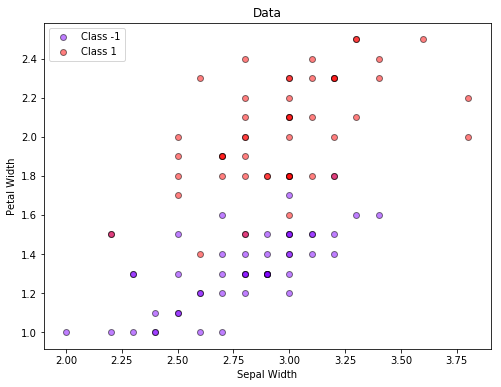

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn import datasets
iris = datasets.load_iris()

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

y = 2*iris.target[iris.target != 0] - 3
X_noscale = iris.data[:,[1, 3]]
X_noscale = X_noscale[iris.target != 0, :]
#X = preprocessing.scale(X_noscale)
X = X_noscale


pl.figure(figsize=(8, 6))
pl.xlabel('Sepal Width')
pl.ylabel('Petal Width')
plot_data(X_noscale, y)

## Implementación de LogisticRegression usando Scikit-Learn

<img src="https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/figures/Scikit-learn.svg" width="60%">

Todos los modelos de clasificación soportados por Scikit-Learn siguen el flujo de trabajo presentado en el gráfico anterior. Durante la sesión vamos a trabajar en la parte de entrenamiento y predicción. En la siguiente sesión se completará el flujo de trabajo revisando la parte de generalización. Scikit-Learn nos permite entrenar modelos de predicción automática a través de un API muy consistente. La implementación de regresión logística se encuentra usando `sklearn.linear_model.LogisticRegression`.

In [2]:
from sklearn.linear_model import LogisticRegression

Primero declaramos un modelo de tipo `LogisticRegression`

In [3]:
classifier = LogisticRegression()

Para construír el modelo a partir de nuestros datos, se hace un llamado a la función `fit()` usando los datos de entrenamiento. `fit()` recibe como parámetros la matriz de características y las etiquetas del conjunto de datos.

In [4]:
classifier.fit(X, y);

Si se desean conocer los parámetros del estimador que se está entrenando, podemos llamar la función `classifier.get_params()`.

In [5]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Explicación de los parámetros:

A continuación, presentamos una descripción de los ṕarámetros más importantes del modelo de regresión logística usando Scikit-Learn:

* $C$: parámetro de regularización. Aunque el concepto de sobreajuste se verá en la siguiente sesión, $C$ penaliza los modelos que se ajusten demasiado al conjunto de datos.
* $class\_weight$: En caso de que el problema de clasificación sea desbalanceado, es decir, existen más elementos de una clase que de la otra, se puede dar mayor peso a aquellas muestras provenientes de la clase de menor número de ejemplos.
* $n\_jobs$: Número de procesos a usar para paralelizar el proceso de entrenamiento. -1 Usa todos los procesadores disponibles menos 1.
* $solver$: `{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}`. Este parámetro corresponde al algoritmo usado para la optimización. La implementación de `liblinear` se encuentra escrita en C++ y es una de las más usadas. `sag` y `saga` recaen en una implementación de gradiente descendente conocida como `Stochastic Average Gradient`.

Para la fase de predicción, basta con llamar `predict()`.

In [6]:
classifier.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Volvemos a declarar una función para visualizar la superficie de decisión de nuestro algoritmo.

In [7]:
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

A continuación, encontramos la superficie de decisión. En este caso de clasificación de dos clases, `LogisticRegression` regresa una predicción que puede ser $1$ o $-1$.

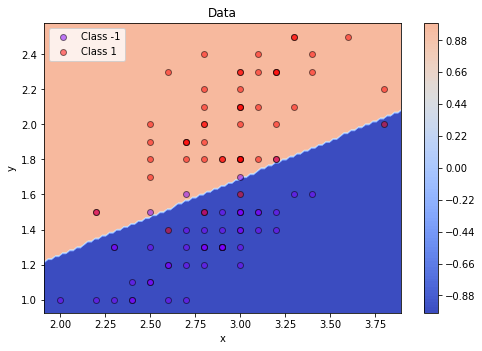

In [8]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier))
plot_data(X, y)

A continuación, comparamos contra la función que se aprendió en la clase de ayer, en la cual observamos la función de discriminación lineal.

<img src="https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/figures/gd_surfacce.png" width="50%">

# Aplicando regresión logística al conjunto de datos IRIS:

## Carga de datos para Scikit-Learn

Los datos en Scikit-Learn se asume que están almacenados en un arreglo de dos dimensiones, cuyo tamaño es [n_muestras, n_características]. Aunque muchos de los algoritmos de Scikit reciben [matrices sparse](http://www.scipy-lectures.org/advanced/scipy_sparse/index.html) de SciPy del mismo tamaño.

- `n_muestras`: El número de muestras. Cada muestra es un item a procesar, en este caso a clasificar. Una muestra consiste en una imagen, un documento, un video, una fila en una base de datos.
- `n_características`: El número de características o rasgos que son usados para describir cada item de forma cuantitativa. Estas características son por lo general valores continuos, aunque también pueden ser boleanos o valores discretos.

El número de características es establecido de antemano, inclusive pueden ser de una alta dimensionalidad. En resumen, en el arreglo de dos dimensiones cada fila corresponderá a un ejemplo del conjunto de datos y cada columna corresponderá a una característica asociada.

## Conjunto de datos IRIS.

In [9]:
iris = datasets.load_iris()

Podemos observar que contiene este objeto que nos regresa scikit-learn usando `keys()`

In [10]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

* `data`: Contiene la matriz de datos descrita en la sección anterior. 
* `target`: Las etiquetas de cada uno de las instancias del conjunto de datos (Filas de la matriz).
* `target_names`: Son los nombres asociados a las etiquetas.
* `feature_names`: Nombres de las características asociadas.

Encontramos que el número de muestras y características de `data` es:

In [11]:
n_samples, n_features = iris.data.shape
print('Número de muestras:', n_samples)
print('Número de características:', n_features)

Número de muestras: 150
Número de características: 4


Observamos que cada fila corresponde a un ejemplar de una especie de flor. Cada flor tiene asociado una serie de características, como el ancho y largo del sépalo, y el ancho y largo del pétalo.

<img src="https://github.com/marcoteran/machinelearning/raw/master/notebooks/01_machinelearnig/figures/iris_petal_sepal.png" width="50%">

Podemos inspeccionar de forma manual las características del último elemento del conjunto de datos:

In [12]:
print(list(zip(iris.feature_names, iris.data[-1])))

[('sepal length (cm)', 5.9), ('sepal width (cm)', 3.0), ('petal length (cm)', 5.1), ('petal width (cm)', 1.8)]


Verificamos que `iris.target` sea del mismo tamaño que el número de muestras en `iris.data`

In [13]:
print(iris.target.shape)

(150,)


Las especies que tratamos de predecir son:

In [14]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


La distribución de elementos por etiqueta está distribuída en el conjunto de datos, es decir, existe el mismo número de flores por especie:

In [15]:
print(list(zip(iris.target_names, np.bincount(iris.target))))

[('setosa', 50), ('versicolor', 50), ('virginica', 50)]


### Visualización usando Pandas

La función `scatter_matrix` de Pandas nos permite visualizar cada elemento del conjunto de datos como una comparación entre características:
* Largo del sépalo (cm)
* Ancho del sépalo (cm)
* Largo del pétalo (cm)
* Ancho del pétalo (cm)

A continuación comparamos cada pareja de características usando `scatter_matrix`:

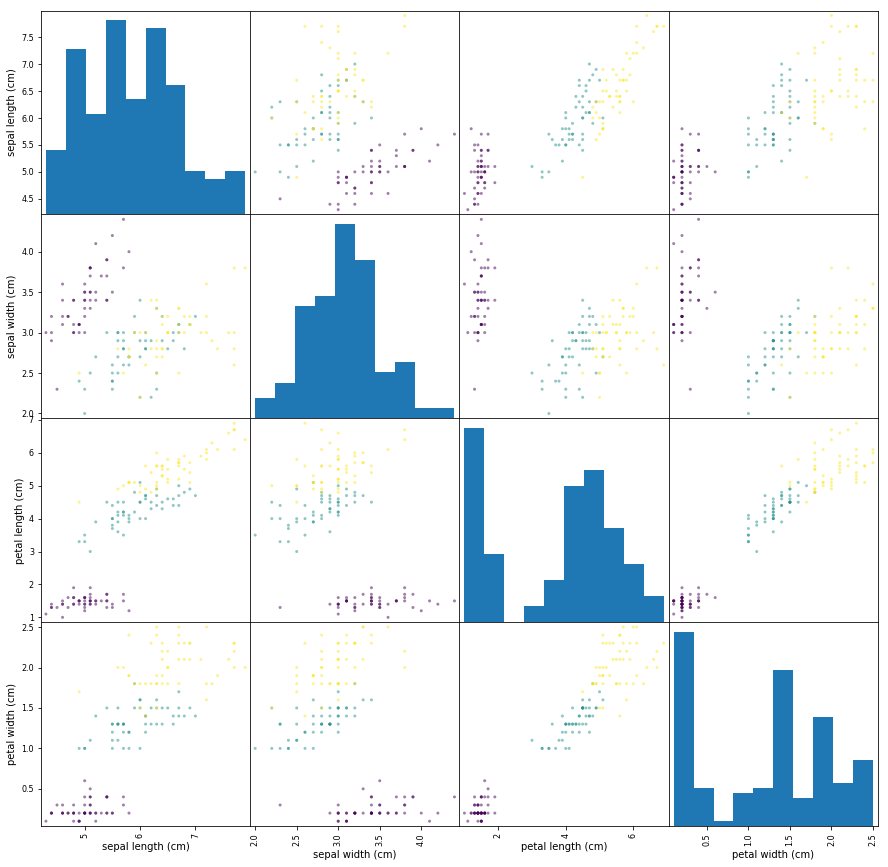

In [16]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(15, 15));

Encontramos que la clase representada de color morado, es la clase Iris Setosa.

## Clasificación binaria usando Scikit-Learn

Ahora que conocemos el conjunto de datos IRIS, queremos entrenar un modelo que sea capaz de clasificar de forma automática cualquier flor representada en un conjunto de datos (Ancho del pétalo (cm), largo del sépalo (cm)', largo del pétalo (cm)', ancho del pétalo (cm)). Como en la demo anterior, filtramos aquellas flores que pertenezcan a la clase versicolor y virginica. Para verificar qué columnas corresponde al largo del sépalo y al ancho del pétalo, imprimimos `feature_names`

In [17]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
X = iris.data[:,[0, 3]] # Columna 0: Largo del sépalo, Columna 3: Ancho del pétalo
y = iris.target

X = X[(y == 1) | (y == 2)] # Filtramos la clase 1 y 2 que corresponden a versicolor y virginica.
y = y[(y == 1) | (y == 2)] 

y = y - 1 # Para que las clases queden entre 0 y 1

Entrenamos el modelo `LogisticRegression` y verificamos los valores predichos. `LogisticRegression` es un modelo lineal, lo que significa que creará una decisión que es lineal en el espacio de entrada. Es decir, encuentra una linea que separa los datos.

In [19]:
classifier = LogisticRegression()
classifier.fit(X, y)
predictions = classifier.predict(X)

print('Número de instancias a predecir: {}'.format(y.shape[0]))
print('Valores de verdad: {}'.format(y))
print('Valores predichos: {}'.format(predictions))

Número de instancias a predecir: 100
Valores de verdad: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Valores predichos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Pregunta**
* ¿Cómo evaluamos el desempeño de nuestro clasificador?

# Evaluación del desempeño - Clasificación binaria

Con el objetivo de conocer el desempeño de nuestro clasificador, se mide cuantitativamente cuantas predicciones fueron correctas. Este número se conoce como **exactitud** o **accuracy** en inglés.

In [20]:
prediction = classifier.predict(X)
np.mean(prediction == y)

0.9

Scikit nos permite evaluar también el accuracy con la función `.score()`

In [21]:
classifier.score(X, y)

0.9

### Matriz de confusión

Sin embargo, es deseable conocer qué clases clasifica mejor. Para poder visualizar esta información, usaremos la matriz de confusión, la cual es una clase especial de tabla de contingencia en la cual se comparan las clases reales contra las clases predichas por el clasificador. Scikit-Learn nos permite construír la matriz de confusión usando `sklearn.metrics.confusion_matrix`. `confusion_matrix` recibe como argumento dos listas o arreglos de NumPy:
* $y$: Etiquetas reales del conjunto de datos
* $\hat{y}$: Etiquetas predichas por el clasificador sobre el conjunto de datos

In [22]:
from sklearn.metrics import confusion_matrix

prediction = classifier.predict(X)
cnf_matrix = confusion_matrix(y, prediction)

`confusion_matrix` regresa una matriz de tamaño [$\textit{n_clases}$, $\textit{n_clases}$], dónde $\textit{n_clases}$ corresponde al número de clases únicas en el conjunto de datos. La matriz de confusión nos permite comparar el rendimiento de nuestro clasificador clase por clase.

In [23]:
print(cnf_matrix)

[[46  4]
 [ 6 44]]


A continuación, vamos a definir una función para generar de una forma más visual la matriz de confusión

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Matriz de confusión',
                          cmap=pl.cm.Blues):
    print(cm) # Confusion matrix

    pl.imshow(cm, interpolation='nearest', cmap=cmap) # Pintamos la matriz como una imagen
    pl.title(title)
    pl.colorbar()
    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45) # Nombre de las clases en X
    pl.yticks(tick_marks, classes) # Nombre de las clases en Y

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pl.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black") 
        # Anotamos cada sección de la imagen con su valor correspondiente en la matriz

    pl.tight_layout()
    pl.ylabel('Valor de verdad')
    pl.xlabel('Valor predicho')

De nuevo, generamos la matriz de confusión y se la pasamos como parámetro a la función recién creada `plot_confusion_matrix`.

[[46  4]
 [ 6 44]]


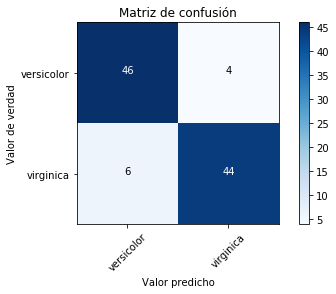

In [25]:
class_names = iris.target_names[1:] # Recordemos que estamos comparando la clase 1 y 2

cnf_matrix = confusion_matrix(y, prediction)
np.set_printoptions(precision=2)

pl.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión')

pl.show()

### **¿Cómo interpretarla?**

* Los valores en la diagonal indican los aciertos de nuestro clasificador. Por ejemplo, sabemos que de 50 ejemplos de la clase versicolor, supo clasificar 46. Mientras que de 50 ejemplos de la clase virginica, se equivocó en 6.
* El accuracy y el error pueden ser a su vez definidos desde la matriz de confusión:

In [26]:
acc = np.sum([cnf_matrix[i, i] for i in range(cnf_matrix.shape[0])])/np.sum(cnf_matrix)

print('Accuracy: {}'.format(acc))

Accuracy: 0.9


In [27]:
err = np.sum([cnf_matrix[0, 1], cnf_matrix[1, 0]])/np.sum(cnf_matrix)

print('Error: {}'.format(err))

Error: 0.1


### ¿Qué pasa cuando el problema es imbalanceado?

Supongamos un clasificador $G$ con el siguiente desempeño sobre un conjunto de datos:

* $Accuracy = \frac{99}{100} = 99\%$  
* $Error = \frac{1}{100} = 1\%$  

**¿Es un buen clasificador?**

Para medir efectivamente si $G$ es un buen clasificador, presentamos la matriz de confusión producto de sus predicciones.

[[ 0  1]
 [ 0 99]]


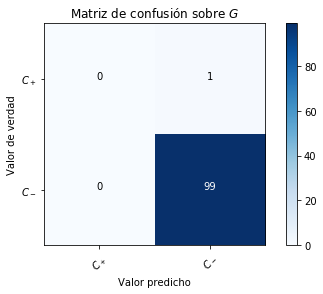

In [28]:
class_names = ['$C_+$', '$C_-$']

y_pred = np.ones(100)
y_test = np.ones(100)
y_test[-1] = 0
mat = confusion_matrix(y_test, y_pred)

pl.figure()
plot_confusion_matrix(mat, classes=class_names,
                      title='Matriz de confusión sobre $G$');

pl.show()

A pesar de que el modelo clasificó correctamente 99 muestras de la clase negativa, falló en clasificar la única muestra positiva del conjunto de datos.

### Precisión, Recall y F1 
La matriz de confusión nos permite calcular otra serie de medidas para evaluar el desempeño del clasificador. Para introducir estas medidas, vamos a descomponer la matriz de confusión en cuatro partes:

<img src="figures/confusion_matrix_1.png" width="30%">

Los componentes de esta matriz pueden interpretarse como:
* TP: Verdaderos positivos. Resultado correcto para la clase positiva.
* TN: Verdaderos negativos. Ausencia correcta para la clase positiva.
* FP: Falsos positivos. Resultados inesperados.
* FN: Falsos negativos. Resultados faltantes.

Vale la pena aclarar que en clasificación binaria, los terminos *positivo* o *negativo* se refieren a la predicción del clasificador (Clase), mientras que *verdadero* o *falso* se refieren a si la predicción fue correcta o no.

De esta matriz podemos volver a escribir las definiciones de accuracy y error:
* $accuracy = \frac{TP + TN}{TP + FN + FP + TN}$
* $error = \frac{FP + FN}{TP + FN + FP + TN}$  

Así como las definiciones de precisión, recall y f1 score:

* $PRE = \frac{TP}{TP + FP}$ 
* $REC = \frac{TP}{FN + TP}$ 
* $F_1 = 2 * \frac{PRE*REC}{PRE + REC}$

La precisión se puede definir como la habilidad del clasificador de **no** clasificar una muestra como positiva cuando es negativa. Mientras el recall (índice de recuperación) se puede definir como la capacidad del clasificador de encontrar todas las muestras positivas. $F_1 \textit{score}$ se define como el promedio pesado de precisión y recall. Evaluemos la precision y el índice de recuperación de nuestro clasificador $G$:

* $PRE = \frac{0}{0}$ = No definida
* $REC = \frac{0}{1} = 0\%$ Recall

Scikit-learn provee diferentes funciones para calcular estas tres medidas. Vamos a medir el desempeño sobre el clasificador $G$

In [29]:
from sklearn import metrics

print('Precision: {}'.format(metrics.precision_score(y_test, y_pred, pos_label=0)))
print('Recall: {}'.format(metrics.recall_score(y_test, y_pred, pos_label=0)))
print('F_1 score: {}'.format(metrics.f1_score(y_test, y_pred, pos_label=0)))

Precision: 0.0
Recall: 0.0
F_1 score: 0.0


/home/ssierral/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ssierral/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


El parámetro `pos_label` indica cual etiqueta corresponde a la clase positiva. Para nuestro ejemplo hemos tomado la clase $0$ como la clase positiva. Por otro lado, el `Warning` generado por Scikit-Learn corresponde a que la medida no se pudo calcular de forma correcta, por la presencia de un denominador en $0$, por lo tanto se le asigna $0$ a la medida. Estas medidas nos indican que el clasificador $G$ no es la mejor opción para resolver el problema. 

### Precisión, recall y F1 sobre IRIS
Regresando al problema de clasificación binario sobre IRIS, podemos calcular precision, recall y F1 de la misma manera:

In [30]:
print('Precision: {}'.format(metrics.precision_score(y, prediction)))
print('Recall: {}'.format(metrics.recall_score(y, prediction)))
print('F_1 score: {}'.format(metrics.f1_score(y, prediction)))

Precision: 0.9166666666666666
Recall: 0.88
F_1 score: 0.8979591836734694


## Clasificación multiclase

**¿Cómo extender a una solución que involucre más de dos clases?**

Existen dos soluciones:
* Uno contra el resto (One vs All). Para esto, seguimos los siguientes pasos:
    * Construímos un clasificador usando regresión logística $h_\theta^{(i)} (x)$ para cada clase $i$, en el cual se trata de predecir la probabilidad de que $y=i$
    * Cuando llegue un nuevo ejemplo $x$, escogemos lo clase $i$ que maximize: 
$$\max_{i} h_\theta^{(i)} (x)$$

<img src="figures/ovr_lr.png" width="60%">

Fuente: https://www.coursera.org/learn/machine-learning/lecture/68Pol/multiclass-classification-one-vs-all

Para indicar que la estrategia de clasificación multiclase es "*One vs Rest*", modificamos el parámetro `multi_class` en el llamado a `LogisticRegression()`.

In [31]:
X = iris.data[:,[0, 2]] 
y = iris.target

classifier_ovr = LogisticRegression(multi_class='ovr')
classifier_ovr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

A continuación visualizamos la función de decisión para el problema multiclase.

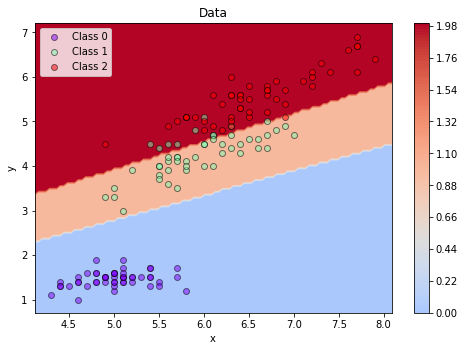

In [32]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier_ovr))
plot_data(X, y)

* Regresión logística multinomial:
    La función logística se puede generalizar para que aprenda una distribución de probabilidad sobre todas las clases. Esta función se conoce como función **SoftMax**. Para esto, $P(y=i\mid \mathbf {x} )$ se puede escribir así:
$$P(y=i\mid \mathbf {x} )={\frac {e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{i}}}{\sum _{k=1}^{K}e^{\mathbf {x} ^{\mathsf {T}}\mathbf {w} _{k}}}}$$
dónde $x$ corresponde a mi vector de características, $K$ al número de clases y $w$ a los coeficientes de la función $wx + w_0$ para la clase $i$.

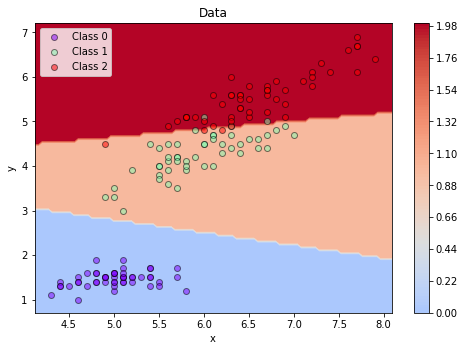

In [33]:
classifier_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs');
classifier_multi.fit(X, y)

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, gen_pred_fun(classifier_multi))
plot_data(X, y)

## Evaluación del desempeño - Caso multiclase

La matriz de confusión se puede extender al problema multiclase de la siguiente manera:

### Matriz de confusión en el caso multiclase

Primero, visualizaremos la matriz de confusión para el modelo de regresión logística multinomial

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


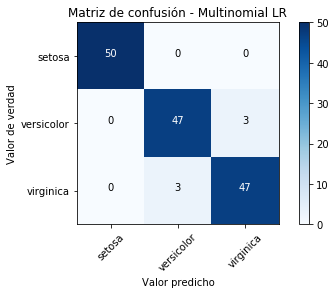

In [34]:
from sklearn.metrics import confusion_matrix

class_names = iris.target_names

y_pred = classifier_multi.predict(X)
mat = confusion_matrix(y, y_pred)

pl.figure()
plot_confusion_matrix(mat, classes=class_names,
                      title='Matriz de confusión - Multinomial LR');

pl.show()

Ahora calculamos la matriz de confusión para el método de regresión logística usando la estrategia "*Uno contra todos*"

[[50  0  0]
 [ 0 40 10]
 [ 0  1 49]]


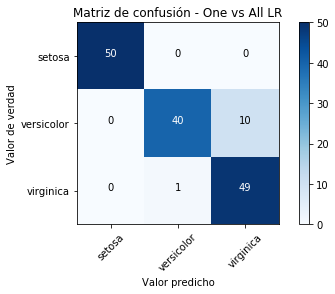

In [35]:
y_pred = classifier_ovr.predict(X)
mat = confusion_matrix(y, y_pred)

pl.figure()
plot_confusion_matrix(mat, classes=class_names,
                      title='Matriz de confusión - One vs All LR');

pl.show()

A simple vista podemos mencionar que:
* La clase *setosa* es fácil de clasificar para ambos clasificadores.
* Aunque el modelo usando "*Uno contra Todos*" tiene mejor desempeño en la clase *virginica*, tiene un pésimo desempeño en la clase *versicolor*, con respecto al modelo usando regresión logística multinomial.

De nuevo, es útil usar una medida de desempeño para comparar cuantitativamente el rendimiento de ambos modelos.

### Accuracy multiclase

El accuracy multiclase se define como la fracción de predicciones correctas del clasificador. Se puede calcular de la siguiente formula:

$$
\texttt{acc}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} 1(\hat{y}_i = y_i)
$$

dónde $y$ corresponde a la lista de etiquetas de verdad de nuestro conjunto de datos, mientras $\hat{y}$ corresponde a los valores predichos por nuestro clasificador para el mismo conjunto de datos y **en el mismo orden**. $n$ corresponde al número de ejemplo del conjunto. Scikit-Learn nos permite calcular el accuracy de la misma manera:

In [36]:
print('Accuracy OVR classifier: {}'.format(classifier_ovr.score(X, y)))
print('Accuracy Multinomial classifier: {}'.format(classifier_multi.score(X, y)))

Accuracy OVR classifier: 0.9266666666666666
Accuracy Multinomial classifier: 0.96


El modelo de regresión logística se desempeña mejor frente al modelo "*Uno vs Todos*". El error se puede definir como la fracción de predicciones incorrectas del clasificador:

In [37]:
print('Error OVR classifier: {}'.format(1-classifier_ovr.score(X, y)))
print('Error Multinomial classifier: {}'.format(1-classifier_multi.score(X, y)))

Error OVR classifier: 0.07333333333333336
Error Multinomial classifier: 0.040000000000000036


### Precision y recall en el problema multiclase

Precision era calculado con base a la matriz de confusión del problema de clasificación binaria. Sin embargo, se puede extender como medida de desempeño para el problema multiclase de varias formas. Recordemos que:

* $Precision = \frac{TP}{TP + FP}$ 
* $Recall = \frac{TP}{TP + FN}$ 
* $F_1 = 2 * \frac{PRE*REC}{PRE + REC}$

Para ilustrar como se calcula cada una de estas medidas, usaremos el clasificador de regresión logística con esquema "*One vs All*". Primero calculamos la *precision* para cada clase y luego determinamos la forma en la que combinamos las precisiones de cada clase:

| Clase    | tp   | fp   | fn   | PRE  | REC  |
|----------|------|------|------|------|------|
|Setosa    | 50   | 0    | 0    | 1.0  | 1.0  |
|          |      |      |      |      |      |
|Versicolor| 40   | 1    | 10   | 0.98 | 0.8  |
|          |      |      |      |      |      |
|Virginica | 49   | 10   | 1    | 0.83 | 0.98 |

Scikit-Learn nos permite calcular la precisión por clase así:

In [38]:
from sklearn.metrics import precision_score
y_pred = classifier_ovr.predict(X)
print('Orden de las etiquetas: {}'.format(iris.target_names))
print('Precision por clase: {}'.format(precision_score(y, y_pred, average=None)))

Orden de las etiquetas: ['setosa' 'versicolor' 'virginica']
Precision por clase: [1.   0.98 0.83]


Añadimos un par de cálculos a nuestra tabla, donde reflejamos la suma de los valores totales de verdaderos positivos, falsos positivos y falsos negativos. Existen varias formas de combinar las medidas de precisión y recall por clase:
* `micro` : Cuenta el total de positivos verdaderos, falsos positivos y falsos negativos
* `macro` : Calcula la precisión por clase y luego la promedia. (Sin tener en cuenta el balance de clases)
* `weighted` : Calcula la precisión por clase y luego la promedia teniendo en cuenta el balance de clases

| Clase    | tp   | fp   | fn   | PRE  | REC  |
|----------|------|------|------|------|------|
|Setosa    | 50   | 0    | 0    | 1.0  | 1.0  |
|          |      |      |      |      |      |
|Versicolor| 40   | 1    | 10   | 0.98 | 0.8  |
|          |      |      |      |      |      |
|Virginica | 49   | 10   | 1    | 0.83 | 0.98 |
|          |      |      |      |      |      |
|Sum(micro)| 139  | 11   | 11   | 0.92 | 0.92 |
|          |      |      |      |      |      |
|Avg(macro)|      |      |      | 0.93 | 0.92 |


In [39]:
print('Precisión macro: {}'.format(precision_score(y, y_pred, average='macro')))
print('Precisión micro: {}'.format(precision_score(y, y_pred, average='micro')))
print('Precisión pesada: {}'.format(precision_score(y, y_pred, average='weighted')))

Precisión macro: 0.9353727435579441
Precisión micro: 0.9266666666666666
Precisión pesada: 0.9353727435579441


Como observamos, estos valores corresponden a las dos últimas filas que se calcularon sobre la tabla de precisión y recall. Vale la pena anotar que `weighted` y `macro` son iguales por el balance de clases. Esto se puede extender al calculo del recall y el $F_1 \textit{score}$. Recordemos que el $F_1 \textit{score}$  es un promedio pesado de la precisión y el recall.

In [40]:
from sklearn.metrics import recall_score, f1_score

print('Recall macro: {}'.format(recall_score(y, y_pred, average='macro')))
print('Recall micro: {}'.format(recall_score(y, y_pred, average='micro')))
print('Recall pesada: {}'.format(recall_score(y, y_pred, average='weighted')))

print('F1 macro: {}'.format(f1_score(y, y_pred, average='macro')))
print('F1 micro: {}'.format(f1_score(y, y_pred, average='micro')))
print('F1 pesada: {}'.format(f1_score(y, y_pred, average='weighted')))

Recall macro: 0.9266666666666667
Recall micro: 0.9266666666666666
Recall pesada: 0.9266666666666666
F1 macro: 0.9260678159760728
F1 micro: 0.9266666666666666
F1 pesada: 0.9260678159760729


# Taller

Usando el conjunto de datos wine:

Lo puede descargar [aquí](https://drive.google.com/open?id=0B8POkZpAJ5qQRlFzVUZnMlZVakk).
Puede obtener más información del conjunto [aquí](https://archive.ics.uci.edu/ml/datasets/wine).

El conjunto de datos contiene los ejemplos de 178 vinos. Cada uno identificado por 13 propiedades químicas:
* Alcohol
* Malic_acid
* Ash
* Alcalinity
* Magnesium
* Phenols
* Flavanoids
* Nonflavanoid
* Proanthocyanins
* Color
* Hue
* OD280/OD315
* Proline

A cada vino le fue asignada una clase, que corresponde al tipo de vino $[1, 2, 3]$

Resuelva:
* Cargue el conjunto de datos como un DataFrame de Pandas
* Cargue la clase en un arreglo aparte. Eliminela del DataFrame de Pandas
* Genere un histograma para cada propiedad del conjunto de datos
* Use `scatter_matrix` y visualize todas las posibles combinaciones de características
    * ¿Encuentra algún par de características en el que se observan las clases bien separadas?
* Clasificación usando solo dos características y el esquema Multinomial:
    * Entrene un modelo LogisticRegression para categorizar el tipo de vino usando `Proline` contra `Flavonoids`.
    * Entrene otro modelo LogisticRegression para categorizar el tipo de vino usando `Alcalinity` contra `Malic Acid`.
    * Imprima la región de decisión de cada clasificador.
    * Genere la matriz de confusión de cada clasificador.
    * Reporte el accuracy, el error de clasificación, la precisión macro, el recall macro y el F1 score macro.
    * ¿Cual modelo se desempeña mejor? ¿Por qué?
* Clasificación usando todas las características:
    * Entrene un modelo LogisticRegression usando el esquema "*One vs All*".
    * Entrene un modelo LogisticRegression usando el esquema multinomial.
    * Genere la matriz de confusión de cada clasificador.
    * Reporte el accuracy, el error de clasificación, la precisión por clase, el recall por clase y el F1 score por clase.
    * ¿Cual modelo se desempeña mejor? ¿Por qué? ¿Cual clase es más sencilla para el clasificador?